# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## 1.1 Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

##  1.2 Handling Imbalanced Dataset

<Axes: xlabel='NObeyesdad', ylabel='count'>

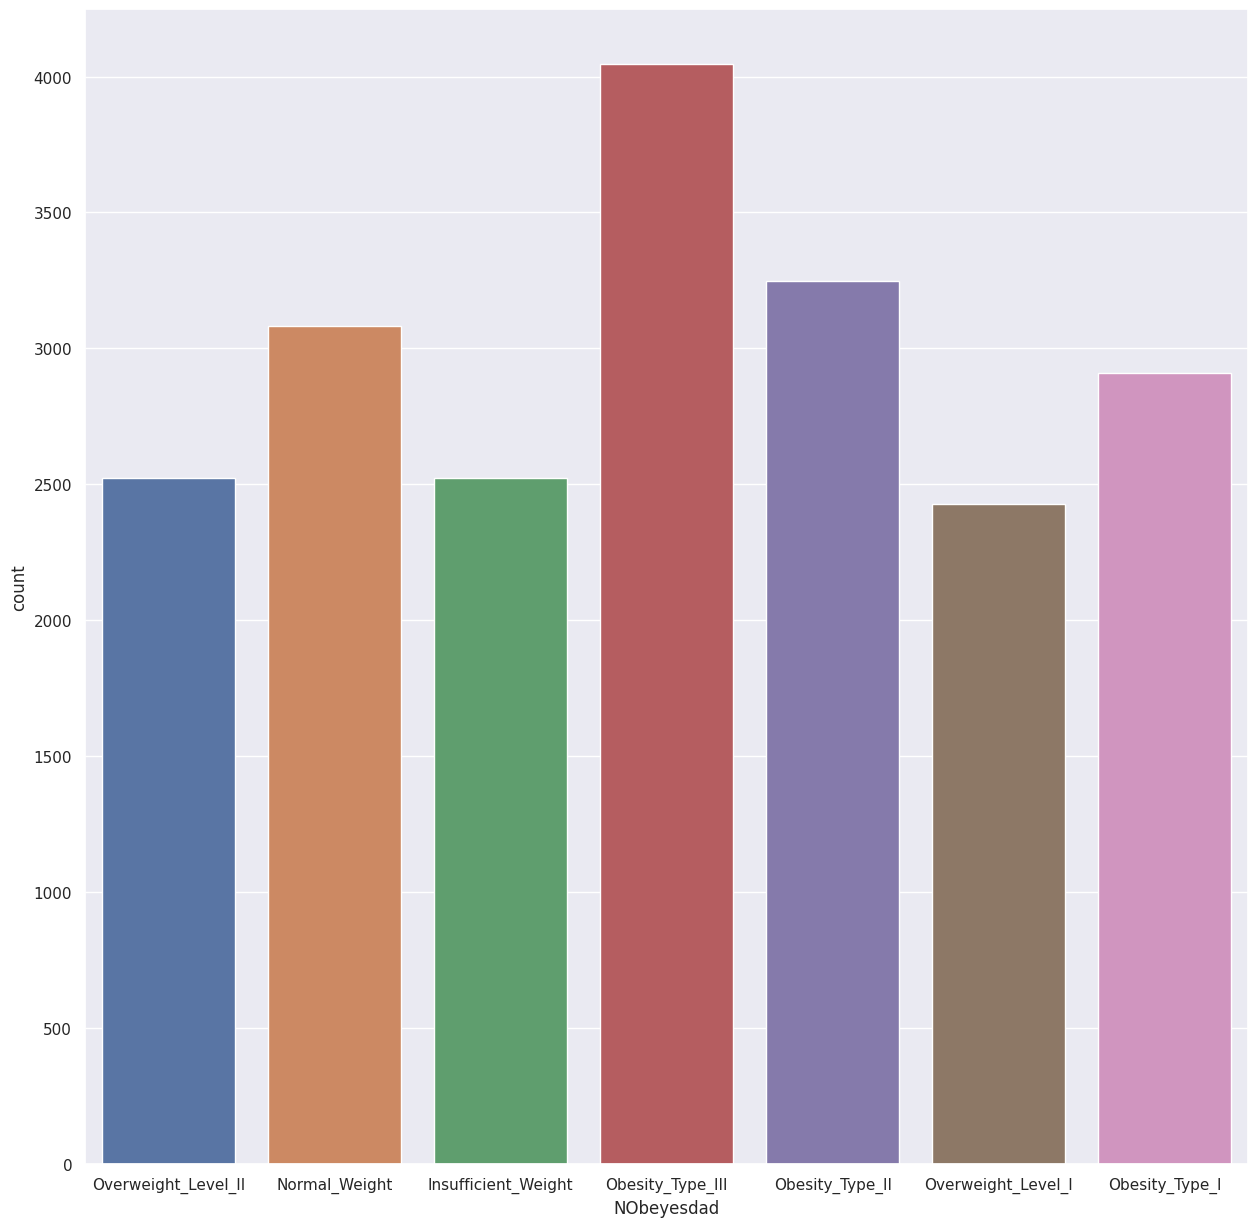

In [5]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(data = df , x = 'NObeyesdad')

In [6]:
ros = RandomOverSampler(random_state= 7)
X, y = ros.fit_resample(df.drop(['NObeyesdad'],axis = 1), df['NObeyesdad'])

In [7]:
df_resampled = X
df_resampled['NObeyesdad'] = y

In [8]:
df_resampled

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,8372,Male,25.472995,1.754441,88.633616,yes,yes,1.846452,1.001633,Sometimes,no,2.000000,no,0.038809,0.374650,Sometimes,Public_Transportation,Overweight_Level_II
28318,15115,Male,55.000000,1.650000,85.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,no,Automobile,Overweight_Level_II
28319,11676,Male,33.000000,1.800000,97.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
28320,18865,Male,17.000000,1.700000,83.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='NObeyesdad', ylabel='count'>

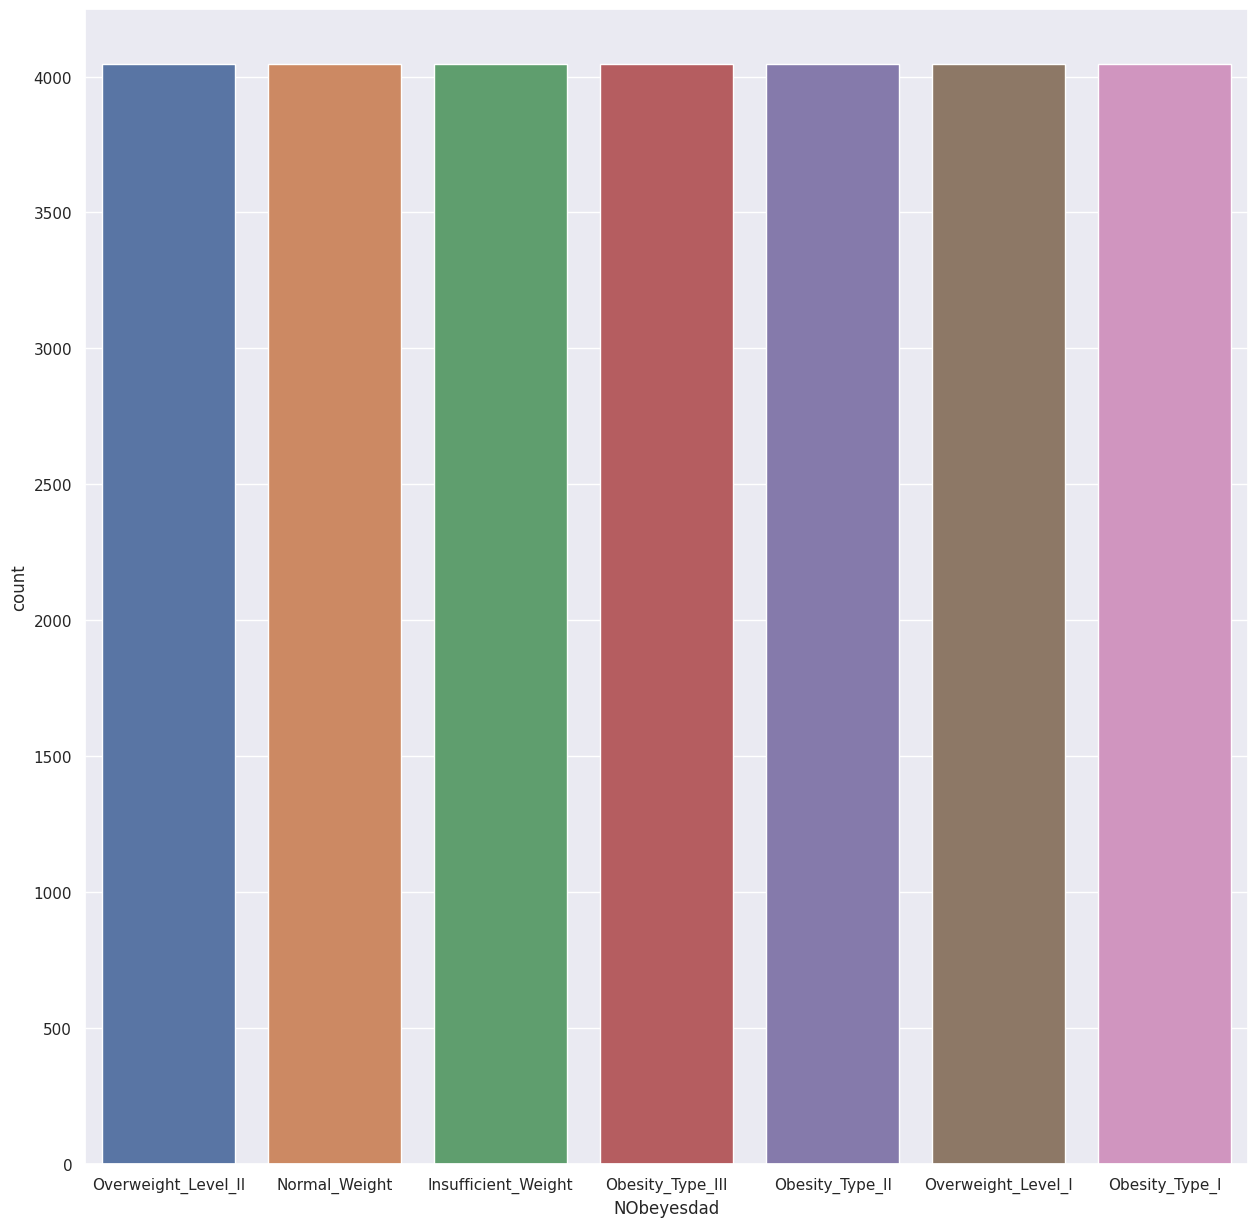

In [9]:
sns.countplot(data = df_resampled , x = 'NObeyesdad')

In [10]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


## 1.3 Handling Categorical Features 

In [11]:
categorical_features = df_resampled.select_dtypes('object').columns

# CAEC and CALC from categorical as CALC in train.csv missing 'always' in unique elements
categorical_features = np.delete(categorical_features,6)

le = LabelEncoder() 
for feature_name in categorical_features:
    df_resampled[feature_name] = le.fit_transform(df_resampled[feature_name])
    try:
        test_df[feature_name] = le.transform(test_df[feature_name])
    except:
        continue
    if feature_name == 'CAEC':
        df_resampled['CALC']  = le.transform(df_resampled['CALC'])
        test_df['CALC'] = le.transform(test_df['CALC'])

In [12]:
df_resampled.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,3,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,3,6


In [13]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3


## 1.4 Removing Unwanted Rows 

In [14]:
test_id = test_df['id']

In [15]:
df_resampled.drop(['id'], axis = 1, inplace = True)
test_df.drop(['id'],axis = 1, inplace = True)

## 1.5 Visualization on Resampled Dataset  

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>],
       [<Axes: title={'center': 'NObeyesdad'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

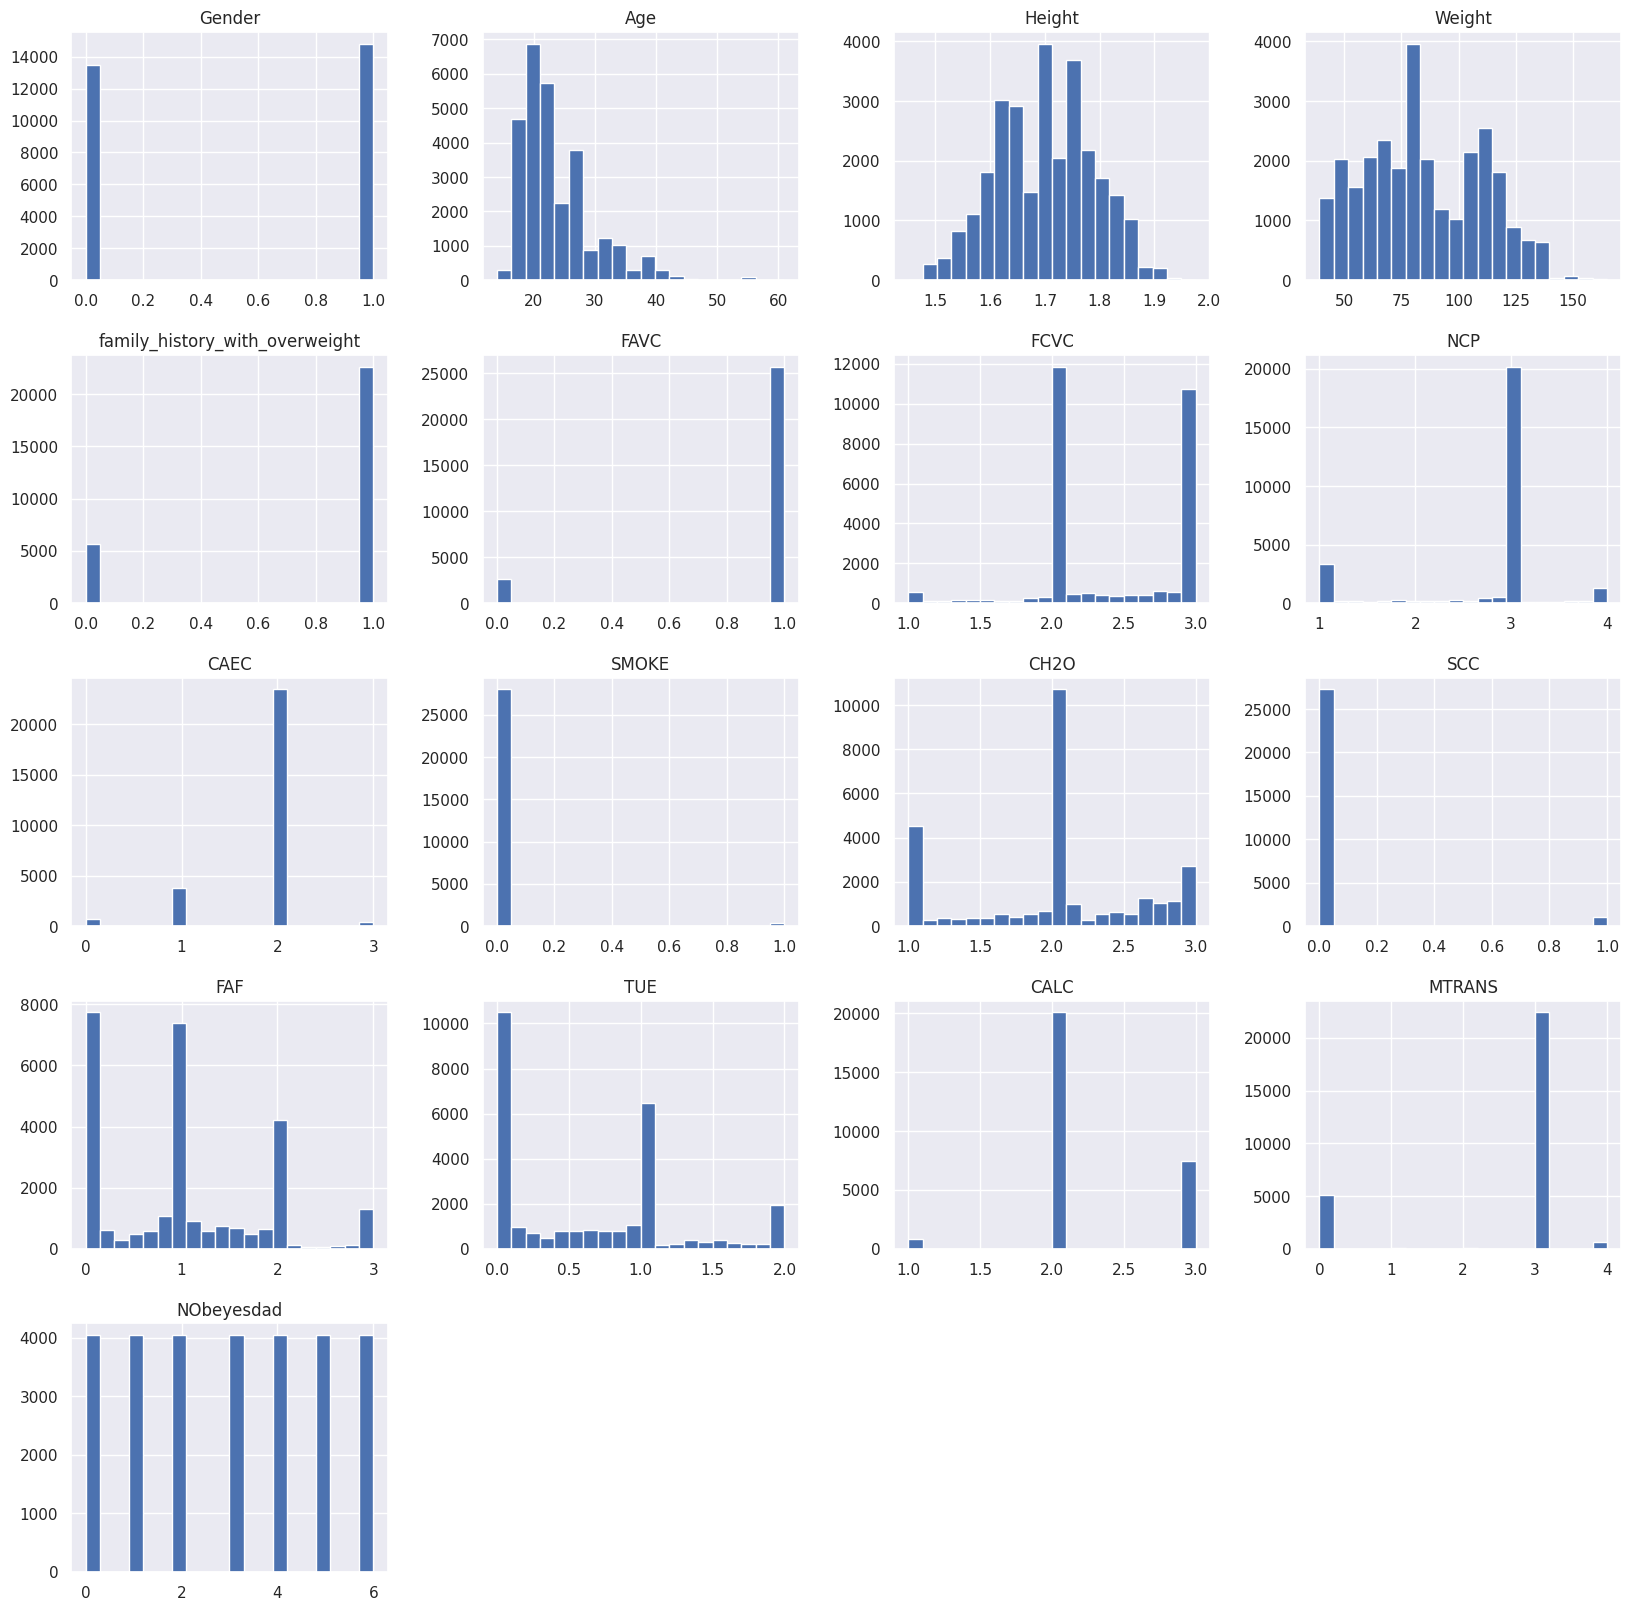

In [16]:
df_resampled.hist(bins = 20,figsize= (20,20))

<Axes: xlabel='CH2O'>

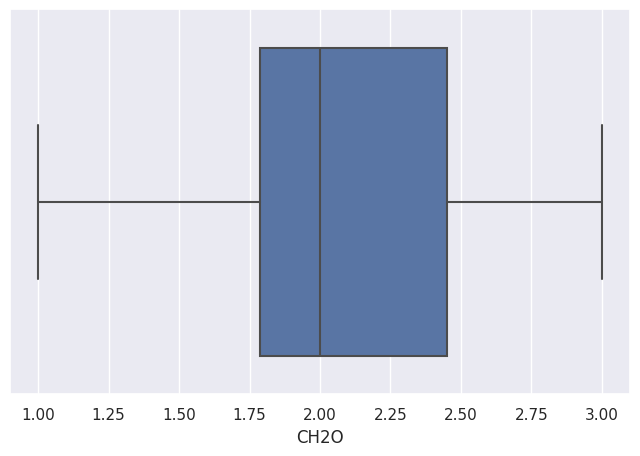

In [17]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(data = df_resampled , x = 'CH2O')

<Axes: xlabel='Weight'>

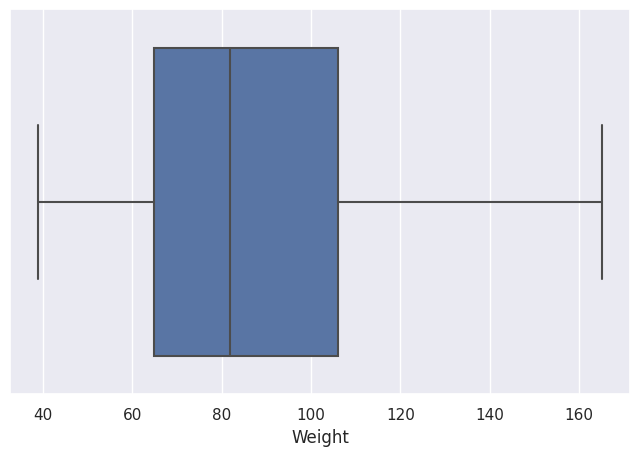

In [18]:
sns.boxplot(data = df_resampled , x = 'Weight')

<Axes: xlabel='Height'>

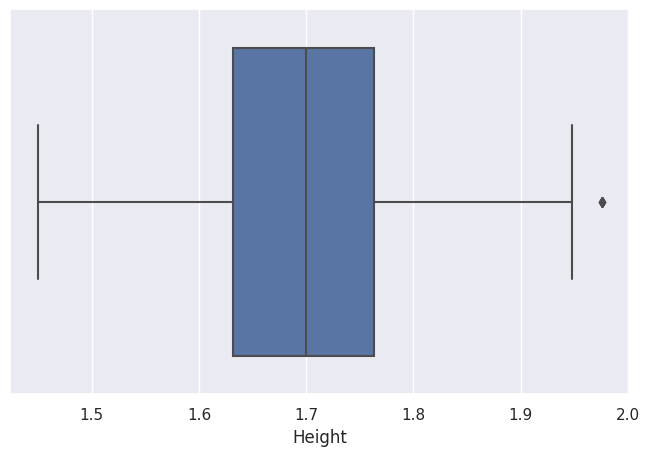

In [19]:
sns.boxplot(data = df_resampled , x = 'Height')

<Axes: xlabel='FCVC'>

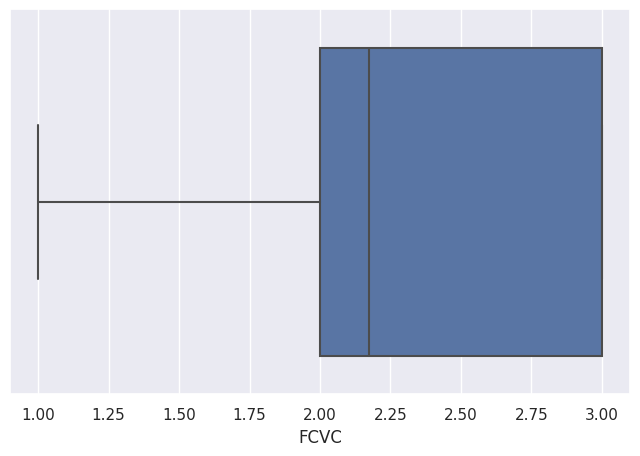

In [20]:
sns.boxplot(data = df_resampled , x = 'FCVC')

<Axes: xlabel='FAF'>

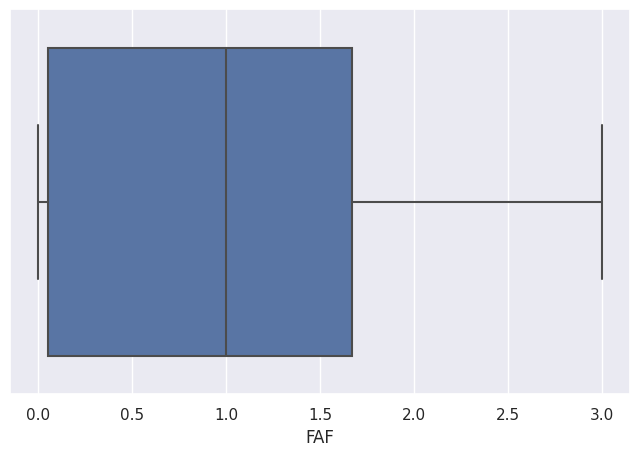

In [21]:
sns.boxplot(data = df_resampled , x = 'FAF')

<Axes: xlabel='TUE'>

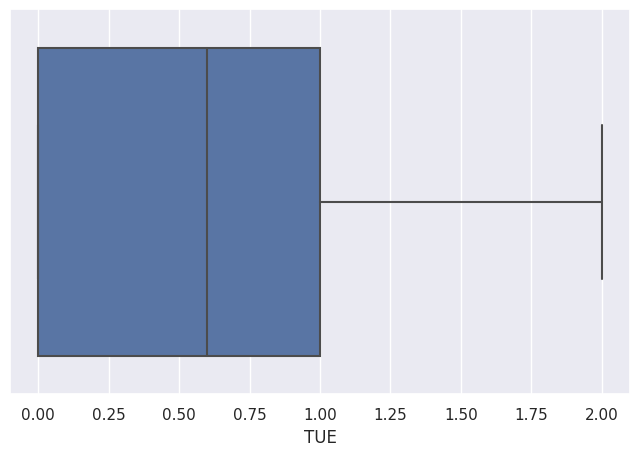

In [22]:
sns.boxplot(data = df_resampled , x = 'TUE')

## 1.6 Removing Outliers 

In [23]:
Q1 = df_resampled['Height'].quantile(0.25)
Q3 = df_resampled['Height'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_resampled['Height'] >= Q1 - 1.5 * IQR) & (df_resampled['Height'] <= Q3 + 1.5 *IQR)

In [24]:
df_resampled = df_resampled.loc[filter]

<Axes: xlabel='Height'>

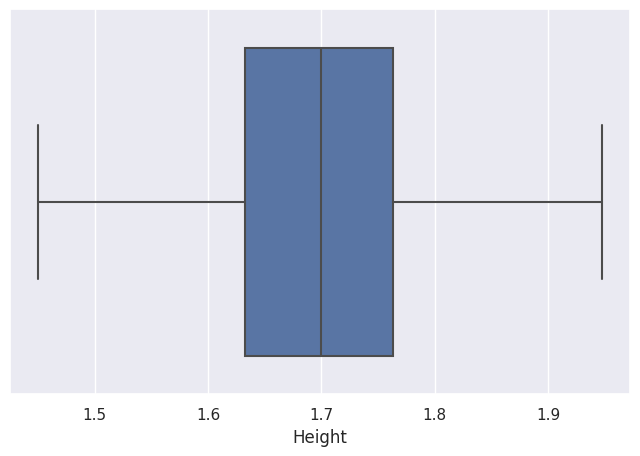

In [25]:
sns.boxplot(data = df_resampled, x = 'Height')

## 1.7 Correlation 

<Axes: >

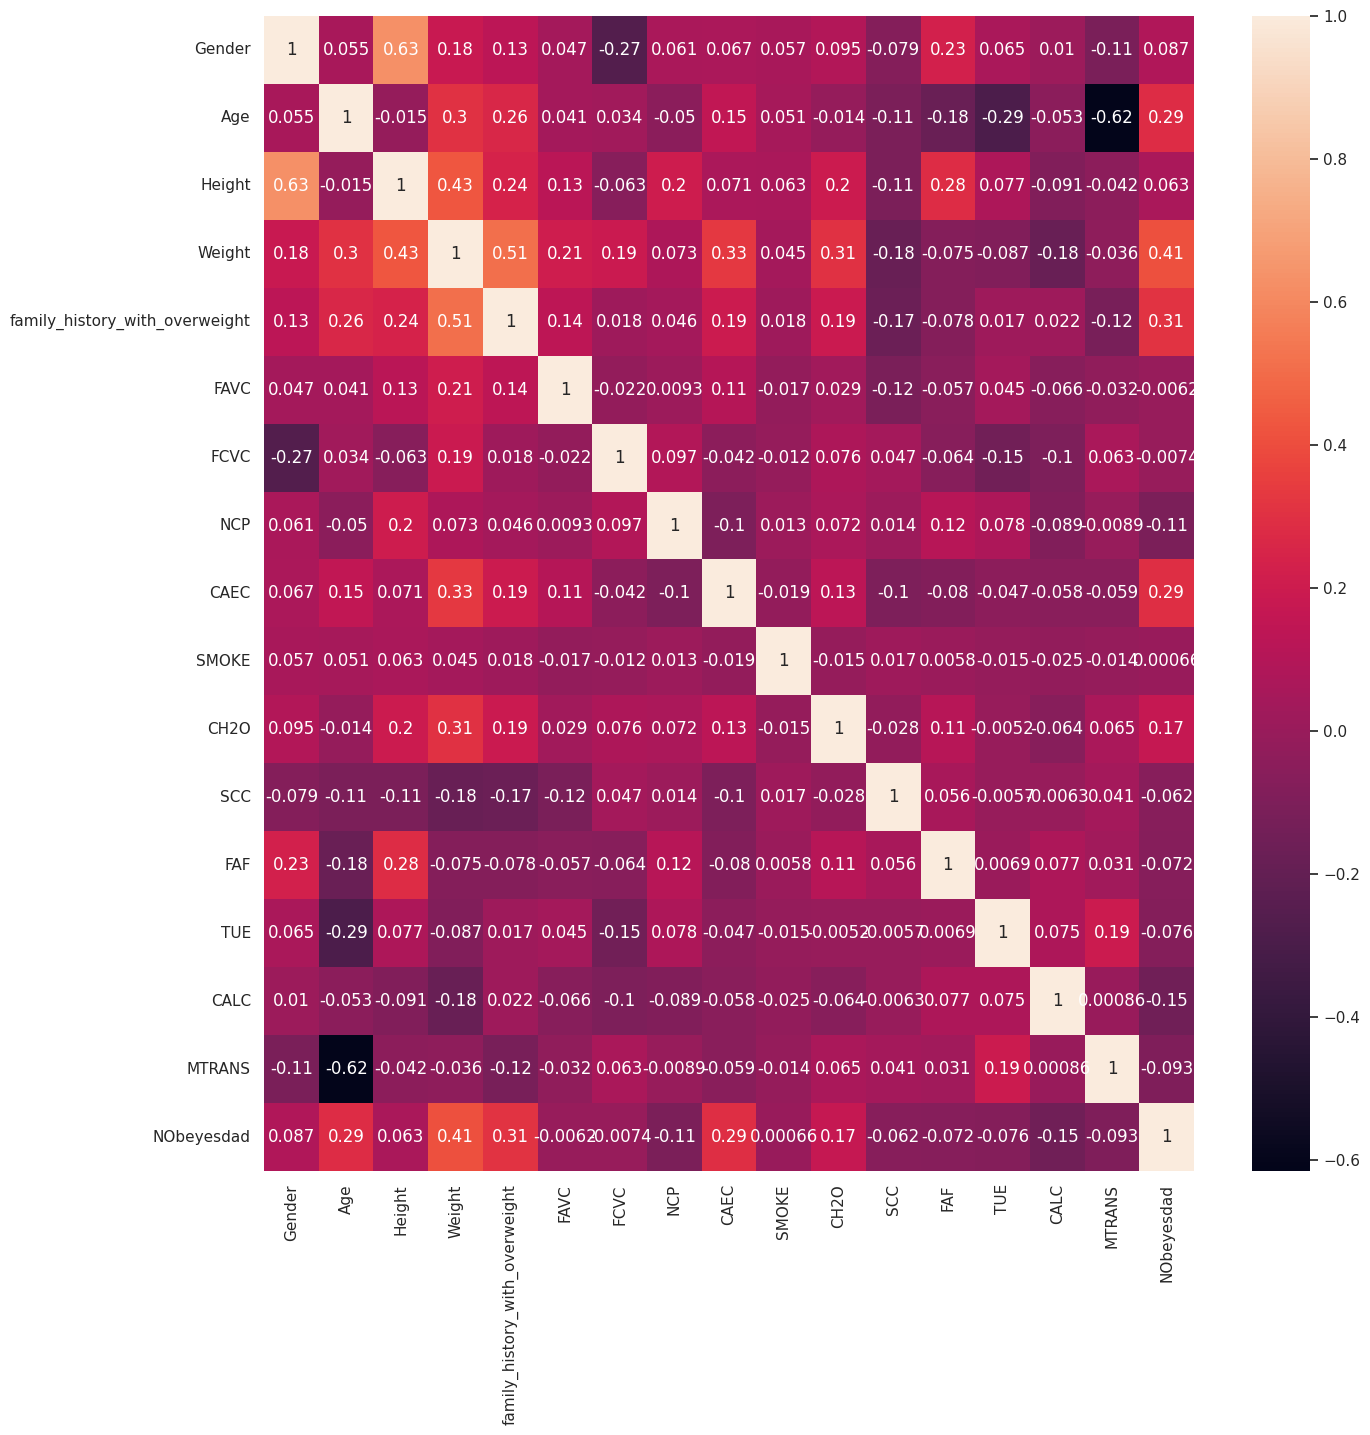

In [26]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data = df_resampled.corr(), annot = True)

# 2.0 Spliting 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop(['NObeyesdad'],axis = 1),df_resampled['NObeyesdad'], test_size= 0.2)

# 3.0 ML Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix,f1_score

## 3.1 Logistic Regression

In [29]:
lr = LogisticRegression(max_iter = 1500)
k = OneVsRestClassifier(estimator = lr).fit(X_train,y_train)

In [36]:
y_pred = k.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))

Accuracy Score:  0.7311087570621468
Recall Score:  0.7311087570621468


In [37]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       816
           1       0.68      0.53      0.60       819
           2       0.61      0.66      0.64       808
           3       0.88      0.96      0.92       810
           4       0.99      1.00      0.99       788
           5       0.51      0.56      0.54       774
           6       0.55      0.45      0.49       849

    accuracy                           0.73      5664
   macro avg       0.72      0.73      0.73      5664
weighted avg       0.72      0.73      0.72      5664



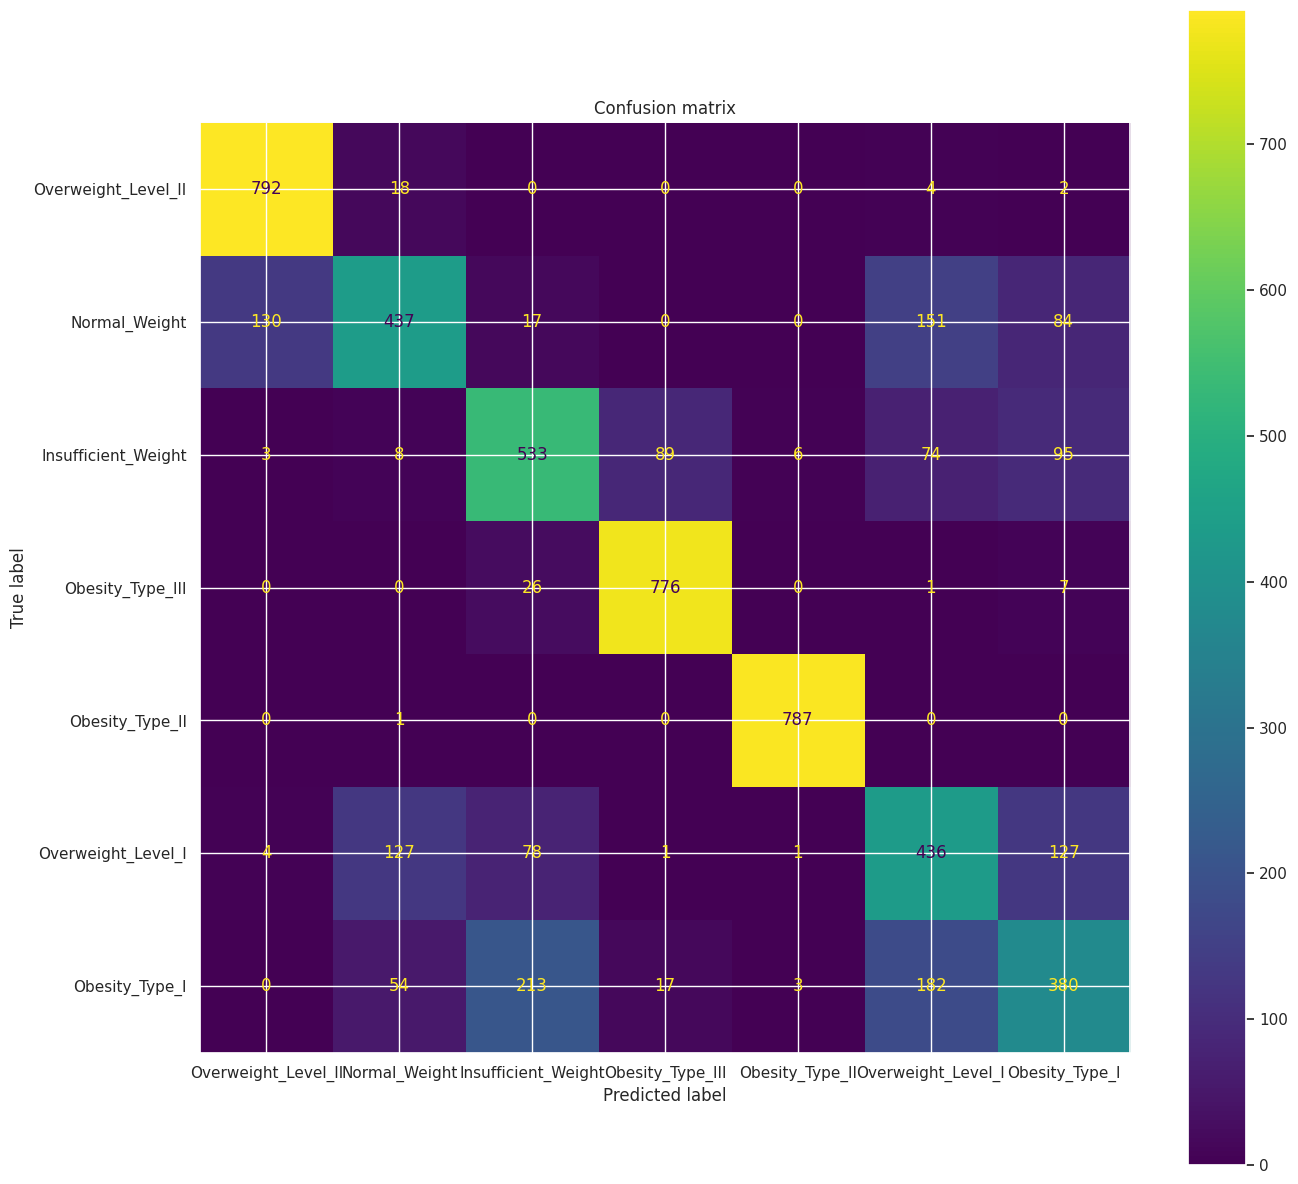

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix")

plt.show();


## 3.2 Decision Tree Classifier 

In [39]:
dt  = DecisionTreeClassifier()
ovr = OneVsRestClassifier(dt).fit(X_train,y_train)

In [43]:
y_pred = ovr.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))

Accuracy Score:  0.90625
Recall Score:  0.90625


In [44]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       816
           1       0.91      0.84      0.88       819
           2       0.94      0.84      0.89       808
           3       0.97      0.95      0.96       810
           4       1.00      1.00      1.00       788
           5       0.88      0.83      0.86       774
           6       0.74      0.93      0.82       849

    accuracy                           0.91      5664
   macro avg       0.92      0.91      0.91      5664
weighted avg       0.91      0.91      0.91      5664



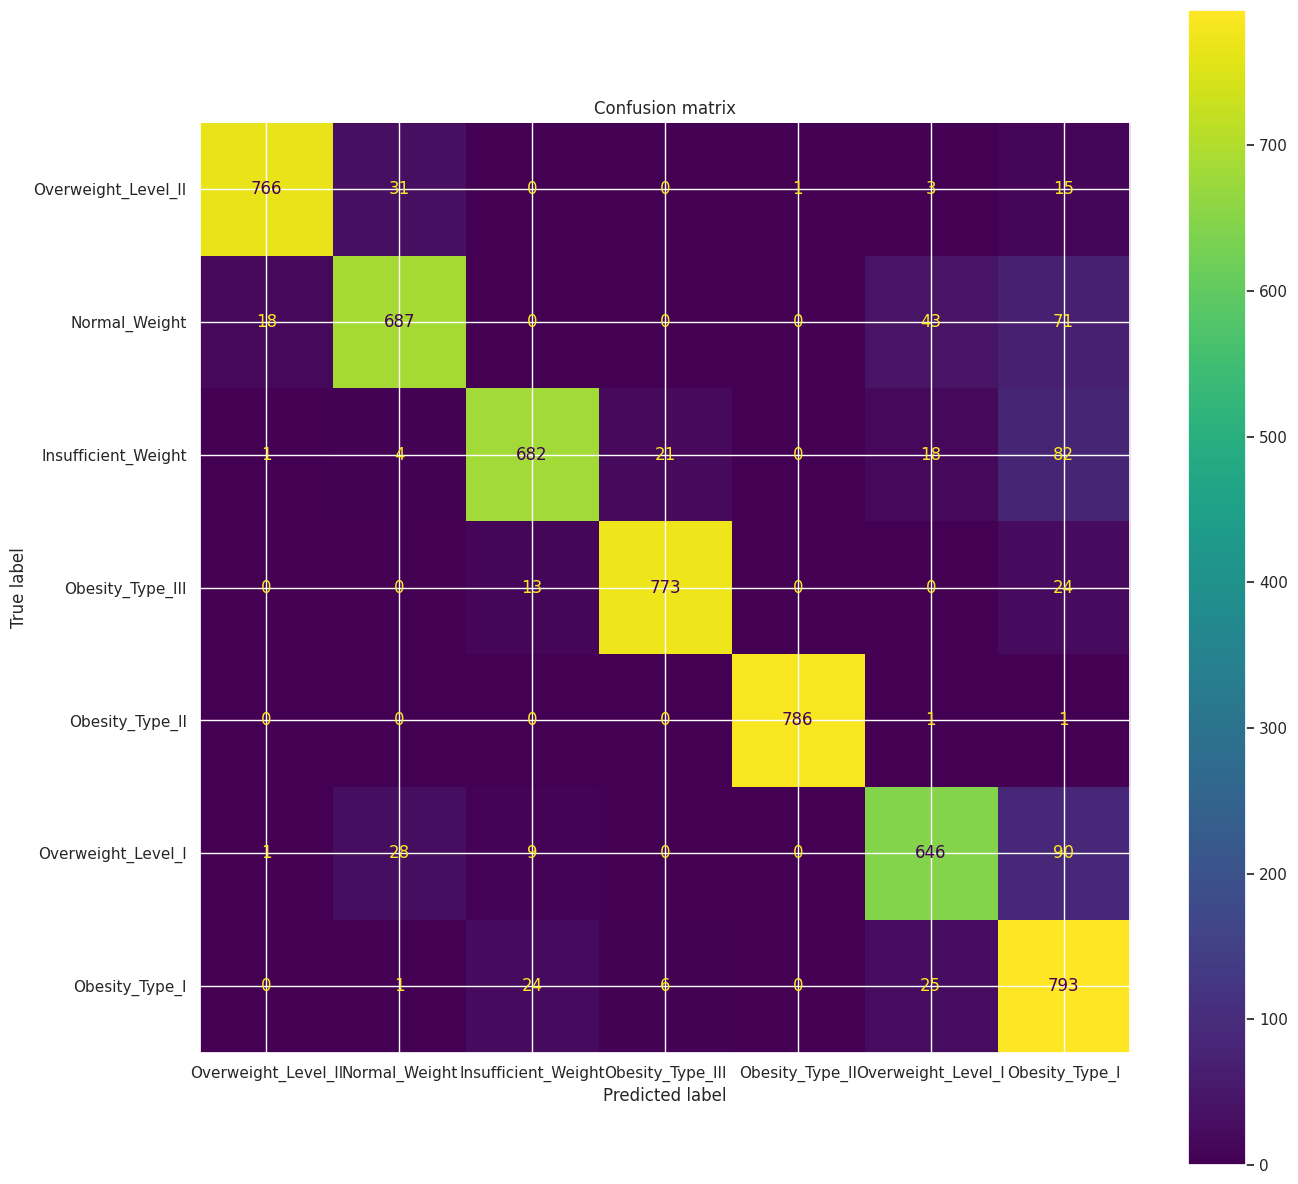

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix")

plt.show();


## 3.3 Random Forest Classifier 

In [46]:
rf = RandomForestClassifier()
ovr  = OneVsRestClassifier(rf).fit(X_train,y_train)

In [47]:
y_pred = ovr.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))

Accuracy Score:  0.942973163841808
Recall Score:  0.942973163841808


In [48]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.91      0.94      0.92       819
           2       0.93      0.93      0.93       808
           3       0.98      0.98      0.98       810
           4       1.00      1.00      1.00       788
           5       0.91      0.89      0.90       774
           6       0.91      0.91      0.91       849

    accuracy                           0.94      5664
   macro avg       0.94      0.94      0.94      5664
weighted avg       0.94      0.94      0.94      5664



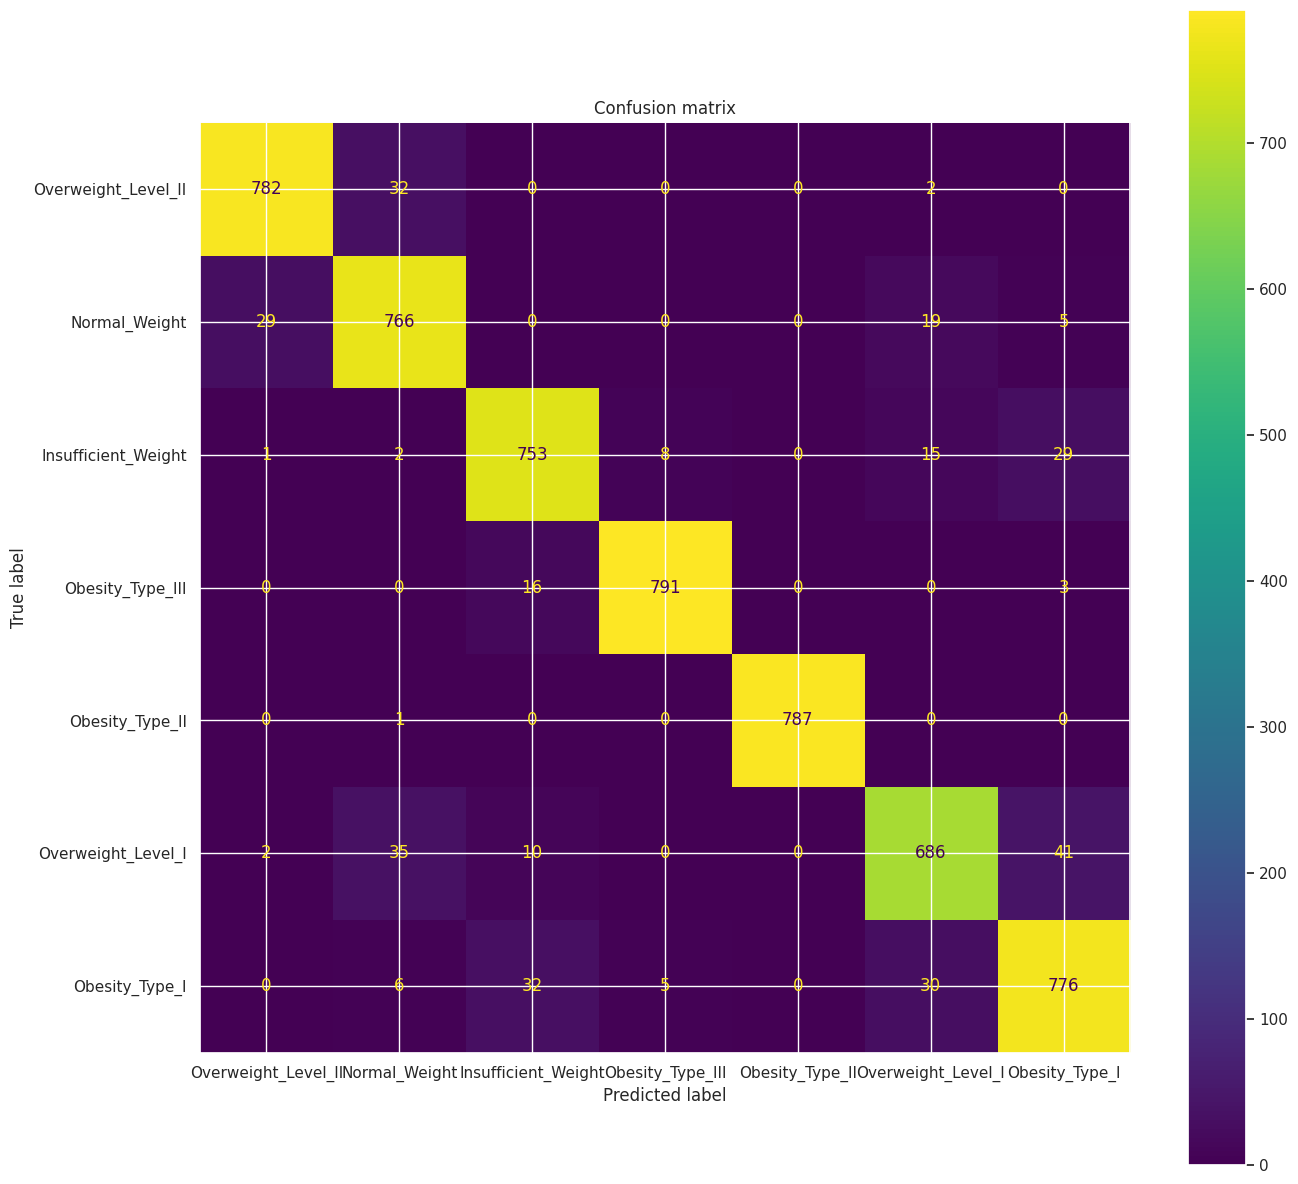

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix")

plt.show();


In [50]:
f1_score(y_test,y_pred,average = 'micro')

0.942973163841808

In [51]:
test_y_pred = ovr.predict(test_df)

In [52]:
test_y_pred = le.inverse_transform(test_y_pred)

In [53]:
sub = pd.DataFrame({'id':test_id,'NObeyesdad':test_y_pred})
sub.to_csv('submission.csv', index=False,header = True)

In [54]:
sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [55]:
np.unique(sub.NObeyesdad)

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

Getting Around 0.900 score 

## 3.4 XGBOOST

In [56]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier(max_depth=16)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
y_pred = xgb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))

Accuracy Score:  0.9424435028248588
Recall Score:  0.9424435028248588


In [60]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.92      0.93      0.92       819
           2       0.93      0.93      0.93       808
           3       0.98      0.98      0.98       810
           4       1.00      1.00      1.00       788
           5       0.91      0.88      0.90       774
           6       0.90      0.92      0.91       849

    accuracy                           0.94      5664
   macro avg       0.94      0.94      0.94      5664
weighted avg       0.94      0.94      0.94      5664



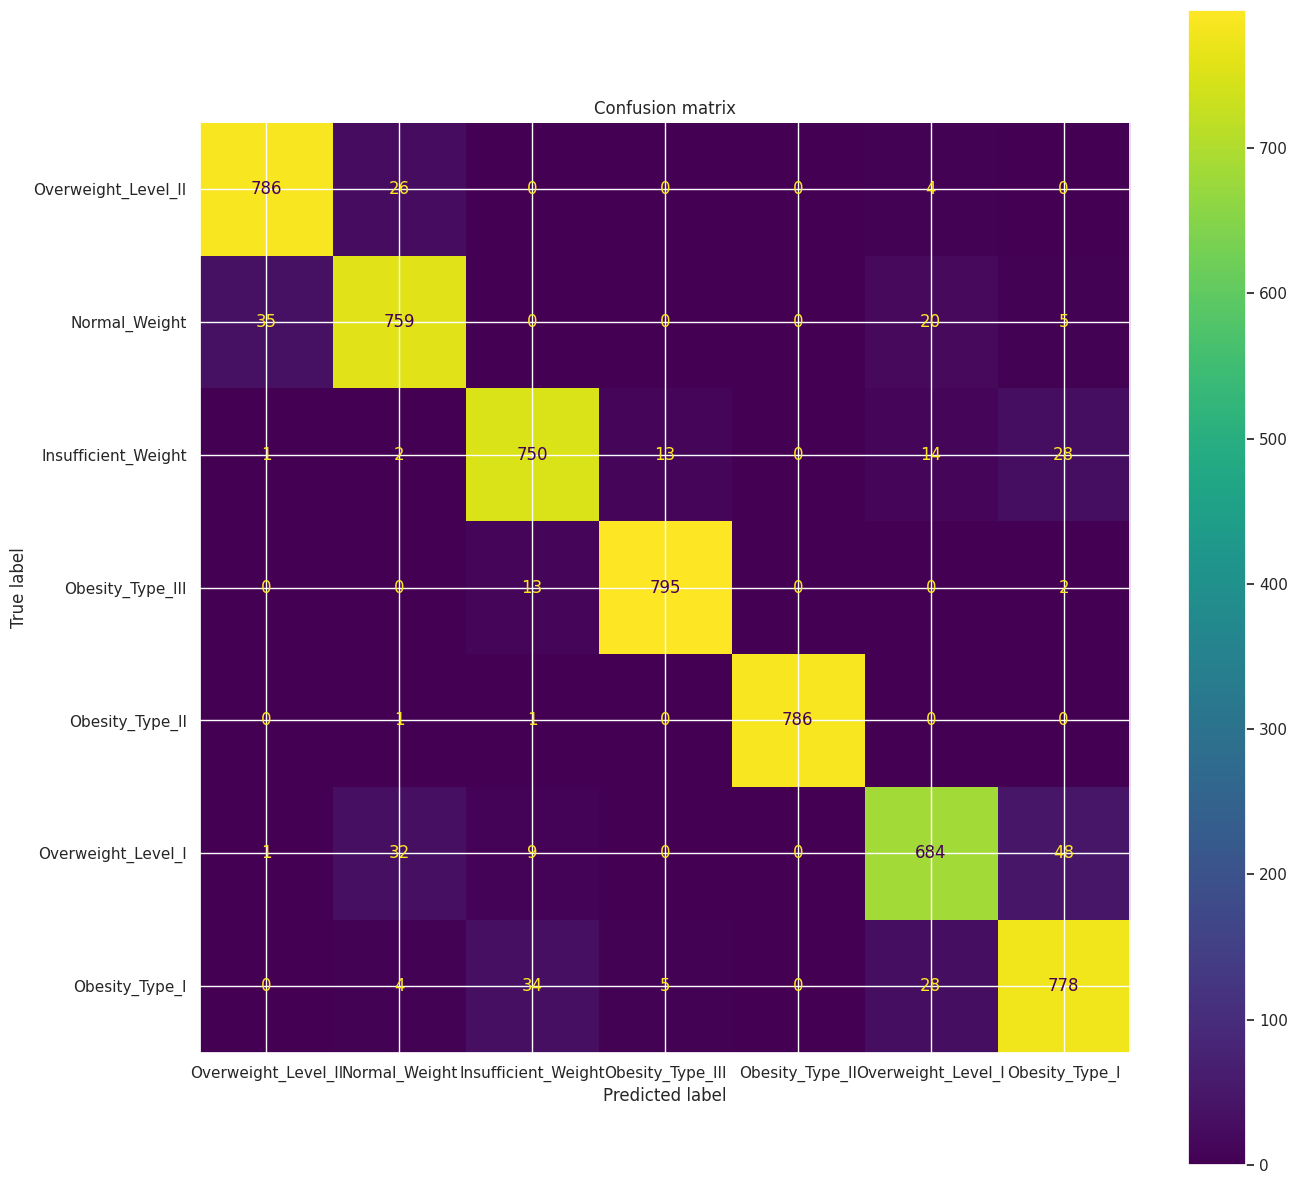

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix")

plt.show();


## 3.5 LGBM

In [63]:
from lightgbm import LGBMClassifier

### 3.5.1 improvising the best params of notebook: https://www.kaggle.com/code/dghosh05/lgbm-solution  

In [64]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
#     'learning_rate': 0.15,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 20,                    # Maximum depth of the trees
#     'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
#     'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}
lgbm = LGBMClassifier(**best_params)
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop(['NObeyesdad'],axis = 1),df_resampled['NObeyesdad'], test_size= 0.2)
lgbm.fit(X_train,y_train)

LGBMClassifier(lambda_l1=0.009667446568254372, lambda_l2=0.040186414373018,
               max_depth=20, metric='multi_logloss', min_child_samples=26,
               n_estimators=500, num_class=7, objective='multiclass',
               random_state=42, verbosity=-1)

In [65]:
y_pred = np.argmax(lgbm.predict_proba(X_test),axis = 1)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))

Accuracy Score:  0.9491525423728814
Recall Score:  0.9491525423728814


In [66]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       833
           1       0.93      0.92      0.92       813
           2       0.95      0.93      0.94       824
           3       0.98      0.99      0.98       811
           4       1.00      1.00      1.00       817
           5       0.91      0.92      0.92       796
           6       0.91      0.92      0.92       770

    accuracy                           0.95      5664
   macro avg       0.95      0.95      0.95      5664
weighted avg       0.95      0.95      0.95      5664



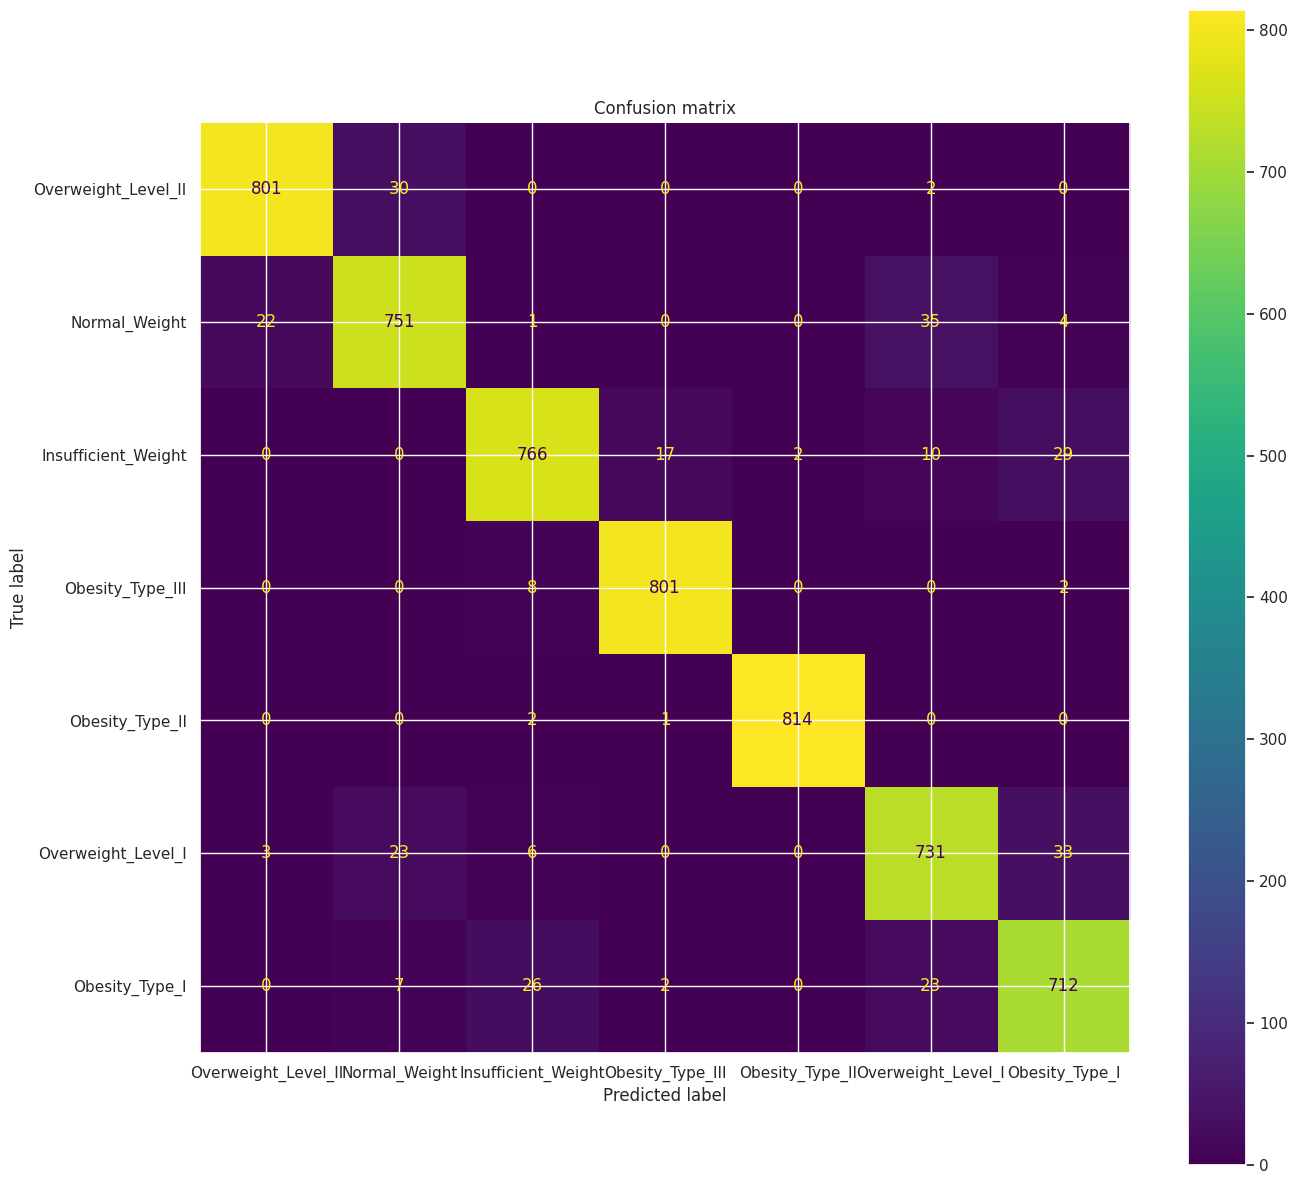

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix")

plt.show();


In [68]:
y_pred  = lgbm.predict_proba(test_df)

In [69]:
y_pred = np.argmax(y_pred,axis = 1)

In [70]:
test_y_pred = le.inverse_transform(y_pred)
sub = pd.DataFrame({'id':test_id,'NObeyesdad':test_y_pred})
sub.to_csv('submission.csv', index=False,header = True)

In [71]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

## 3.6 Ensembling of RF, XGB, LGBM

In [72]:
rf_train_pred = ovr.predict_proba(X_train)
xgb_train_pred = xgb.predict_proba(X_train)
lgbm_train_pred = lgbm.predict_proba(X_train)
X_ensem = np.concatenate([rf_train_pred,xgb_train_pred,lgbm_train_pred],axis = 1)

In [73]:
rf_test_pred = ovr.predict_proba(X_test)
xgb_test_pred = xgb.predict_proba(X_test)
lgbm_test_pred = lgbm.predict_proba(X_test)
X_test_ensem = np.concatenate([rf_test_pred,xgb_test_pred,lgbm_test_pred],axis = 1)

In [74]:
elr = OneVsRestClassifier(LogisticRegression())
elr.fit(X_ensem,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [76]:
y_pred = elr.predict(X_test_ensem)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred, average='micro'))

Accuracy Score:  0.9553319209039548
Recall Score:  0.9553319209039548


In [77]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       833
           1       0.94      0.94      0.94       813
           2       0.95      0.94      0.94       824
           3       0.98      0.99      0.98       811
           4       1.00      1.00      1.00       817
           5       0.92      0.92      0.92       796
           6       0.92      0.93      0.93       770

    accuracy                           0.96      5664
   macro avg       0.95      0.96      0.95      5664
weighted avg       0.96      0.96      0.96      5664



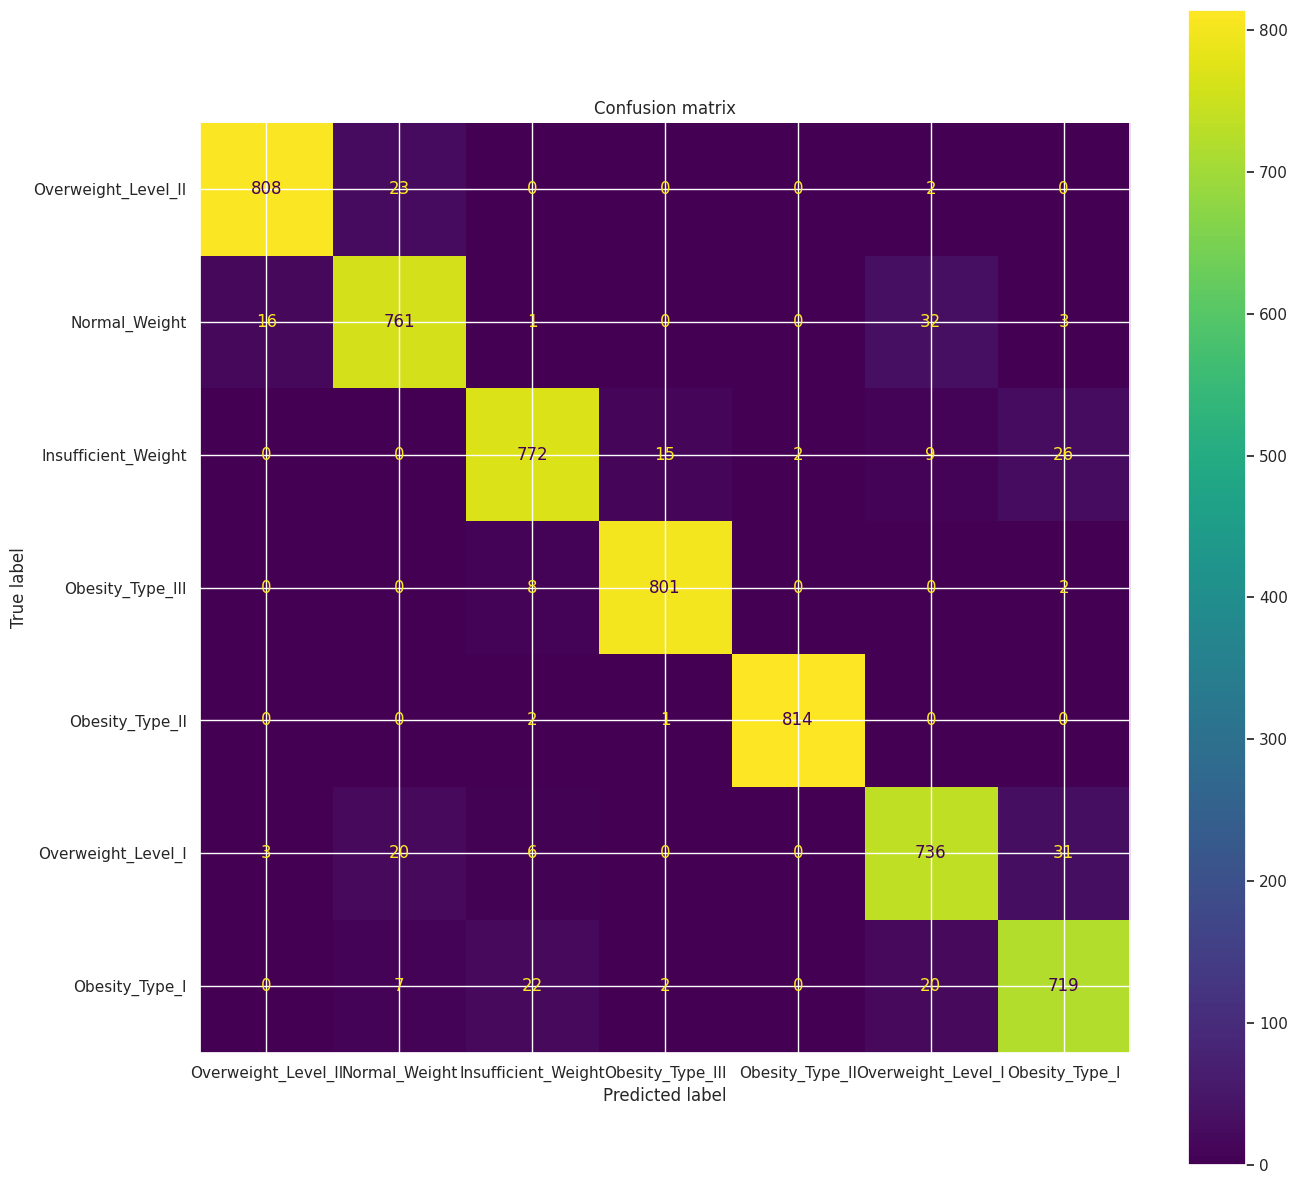

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix")

plt.show();


In [79]:
rf_testdf_pred = ovr.predict_proba(test_df)
xgb_testdf_pred = xgb.predict_proba(test_df)
lgbm_testdf_pred = lgbm.predict_proba(test_df)
X_testdf_ensem = np.concatenate([rf_testdf_pred,xgb_testdf_pred,lgbm_testdf_pred],axis = 1)

In [80]:
y_pred = elr.predict(X_testdf_ensem)
test_y_pred = le.inverse_transform(y_pred)
sub = pd.DataFrame({'id':test_id,'NObeyesdad':test_y_pred})
sub.to_csv('submission.csv', index=False,header = True)

In [81]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

Got Around 0.906